# Module 2: Exploration data analysis of visualization and training a model by given attributes

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [3]:
data = p.read_csv("Bitcoin.csv")

In [4]:
df=data.dropna()

In [5]:
df.columns

Index(['Date', 'BTC price [USD]', 'n-transactions', 'fee [USD]',
       'btc search trends', 'Gold price[USD]', 'SP500 close index',
       'Oil WTI price[USD]', 'M2(Not seasonally adjusted)[1e+09 USD]'],
      dtype='object')

In [6]:
df.rename(columns={"BTC price [USD]":"BTC_price_USD"},inplace=True)
df.rename(columns={"n-transactions":"n_transactions"},inplace=True)
df.rename(columns={"fee [USD]":"fee_USD"},inplace=True)
df.rename(columns={"btc search trends":"btc_search_trends"},inplace=True)
df.rename(columns={"Gold price[USD]":"Gold_price_USD"},inplace=True)
df.rename(columns={"SP500 close index":"SP500_close_index"},inplace=True)
df.rename(columns={"Oil WTI price[USD]":"Oil_WTI_price_USD"},inplace=True)
df.rename(columns={"M2(Not seasonally adjusted)[1e+09 USD]":"M2_money_supply_USA"},inplace=True)

In [7]:
df.columns

Index(['Date', 'BTC_price_USD', 'n_transactions', 'fee_USD',
       'btc_search_trends', 'Gold_price_USD', 'SP500_close_index',
       'Oil_WTI_price_USD', 'M2_money_supply_USA'],
      dtype='object')

Text(0.5, 1.0, 'Number of n-transactions')

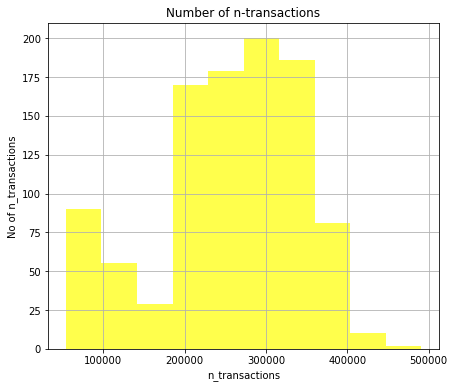

In [8]:
#Histogram Plot 
df['n_transactions'].hist(figsize=(7,6), color='yellow', alpha=0.7)
plt.xlabel('n_transactions')
plt.ylabel('No of n_transactions')
plt.title('Number of n-transactions')

Text(0.5, 1.0, 'Number of fee_USD')

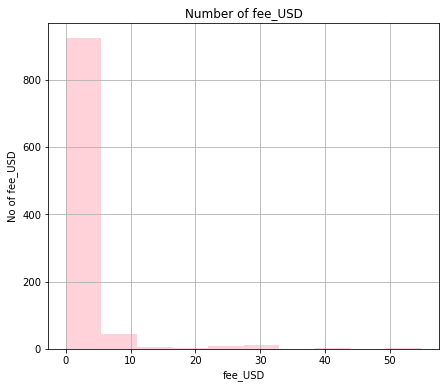

In [9]:
#Histogram Plot 
df['fee_USD'].hist(figsize=(7,6), color='pink', alpha=0.7)
plt.xlabel('fee_USD')
plt.ylabel('No of fee_USD')
plt.title('Number of fee_USD')

Text(0.5, 1.0, 'Number of btc_search_trends')

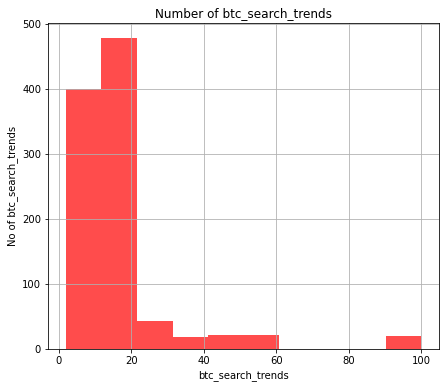

In [10]:
#Histogram Plot 
df['btc_search_trends'].hist(figsize=(7,6), color='red', alpha=0.7)
plt.xlabel('btc_search_trends')
plt.ylabel('No of btc_search_trends')
plt.title('Number of btc_search_trends')

Text(0.5, 1.0, 'Number of Gold_price_USD')

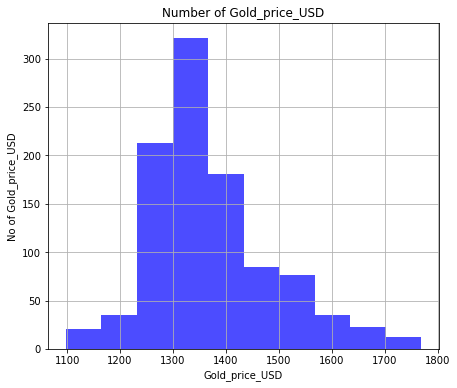

In [11]:
#Histogram Plot 
df['Gold_price_USD'].hist(figsize=(7,6), color='blue', alpha=0.7)
plt.xlabel('Gold_price_USD')
plt.ylabel('No of Gold_price_USD')
plt.title('Number of Gold_price_USD')

Text(0.5, 1.0, 'Number of SP500_close_index')

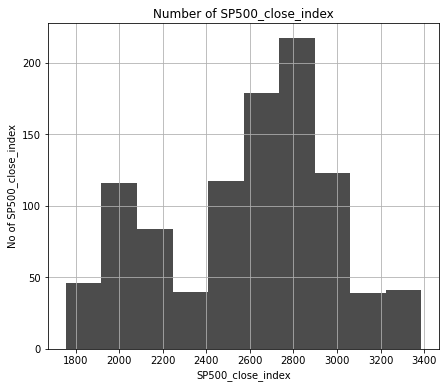

In [12]:
#Histogram Plot 
df['SP500_close_index'].hist(figsize=(7,6), color='black', alpha=0.7)
plt.xlabel('SP500_close_index')
plt.ylabel('No of SP500_close_index')
plt.title('Number of SP500_close_index')

3      15.77
13     14.27
10      8.38
12      8.18
14      5.49
22      4.29
20      4.29
18      4.19
2       3.59
15      2.89
8       2.69
4       2.69
6       2.59
17      2.20
19      2.20
44      2.10
54      2.10
21      2.00
100     2.00
16      2.00
40      1.90
11      1.90
7       0.80
5       0.80
9       0.70
Name: btc_search_trends, dtype: float64

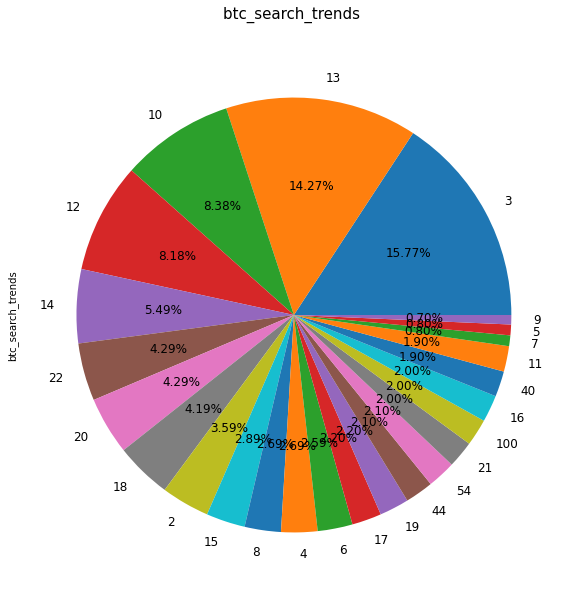

In [13]:
#Propagation by variable
def PropByVar(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12)
    ax.set_title(variable + ' \n', fontsize = 15)
    return n.round(dataframe_pie/df.shape[0]*100,2)
PropByVar(df, 'btc_search_trends')

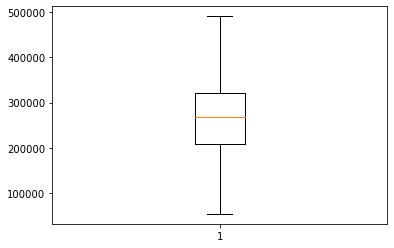

In [14]:
plt.boxplot(df['n_transactions'])
plt.show()

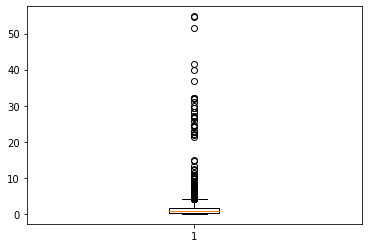

In [15]:
plt.boxplot(df['fee_USD'])
plt.show()

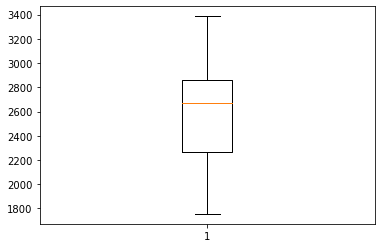

In [16]:
plt.boxplot(df['SP500_close_index'])
plt.show()

<AxesSubplot:>

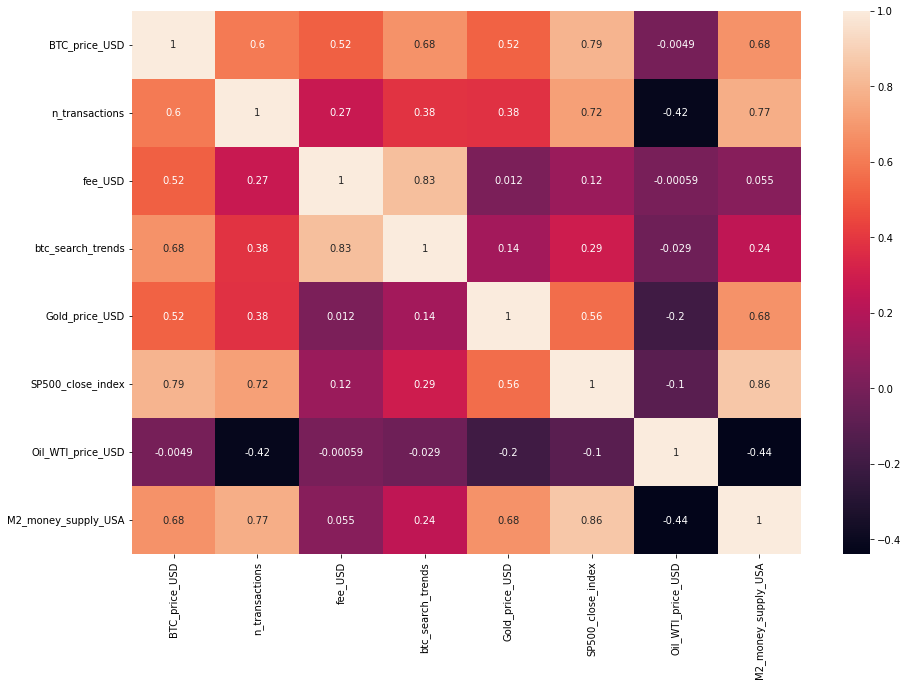

In [17]:
# Heatmap plot diagram
fig, ax = plt.subplots(figsize=(15,10))
s.heatmap(df.corr(), annot=True)

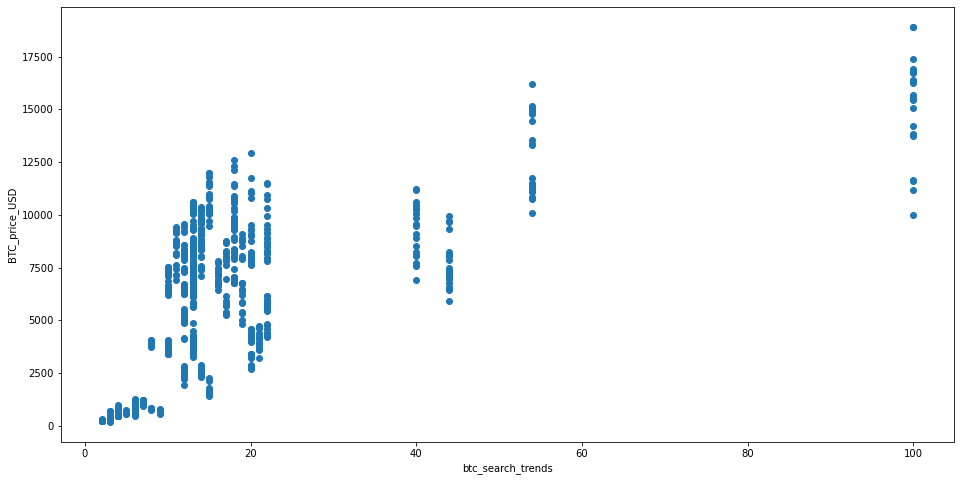

In [18]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['btc_search_trends'],df['BTC_price_USD'])
ax.set_xlabel('btc_search_trends')
ax.set_ylabel('BTC_price_USD')
plt.show()

In [19]:
df.columns

Index(['Date', 'BTC_price_USD', 'n_transactions', 'fee_USD',
       'btc_search_trends', 'Gold_price_USD', 'SP500_close_index',
       'Oil_WTI_price_USD', 'M2_money_supply_USA'],
      dtype='object')

In [20]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Date', 'BTC_price_USD', 'n_transactions', 'fee_USD',
       'btc_search_trends', 'Gold_price_USD', 'SP500_close_index',
       'Oil_WTI_price_USD', 'M2_money_supply_USA']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)


In [21]:
df.head()

,Date,BTC_price_USD,n_transactions,fee_USD,btc_search_trends,Gold_price_USD,SP500_close_index,Oil_WTI_price_USD,M2_money_supply_USA
0,0,233,1,15,6,45,7,839,0
6,1,240,10,15,6,46,8,829,0
12,2,246,2,19,6,68,10,830,0
15,3,244,5,16,6,78,9,837,0
21,4,245,14,16,6,110,4,843,0


Spliting Train/Test:

In [22]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='BTC_price_USD', axis=1)
#Response variable
y = df.loc[:,'BTC_price_USD']    

In [23]:
#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))


Number of training dataset:  701
Number of test dataset:  301
Total number of dataset:  1002
